### 1. 탐색과 정렬  
#### Q1) 왜 이 방법이 더 효율적일까?
#### Q2) 각 코드의 의미는?

In [1]:
def binarysearch(data, target):
    start = 0
    end = len(data) - 1
    while start <= end :# 이 코드의 의미는?
        mid = (start + end) // 2 # 이 코드의 의미는?
        if data[mid] == target: # 이 코드의 의미는?
            return mid 
        elif data[mid] < target: # 이 코드의 의미는?
            start = mid + 1
        else: # 이 코드의 의미는?
            end = mid -1
    return None # 이 코드의 의미는?

print(binarysearch([0,1,2,3,4,5], 4))
print(binarysearch([0,1,2,3,4,5], 6))

4
None


In [2]:
def quicksort(data) : 
    if len(data) <= 1 :# 이 코드의 의미는?
        return data
    low, eq, high = [], [], []
    pivot = data[0] # 이 코드의 의미는?
    for n in data :
        if n == pivot : # 이 코드의 의미는?
            eq.append(n)
        elif n < pivot :
            low.append(n)
        else :
            high.append(n)
    return quicksort(low) + eq + quicksort(high) # 이 코드의 의미는?

print(quicksort([23,56,-123,2567,865,157,-36]))

[-123, -36, 23, 56, 157, 865, 2567]


### 2. 퍼셉트론
#### * 뉴런과 퍼셉트론의 닮은 점 이해하기
- 입력 -> (입력 * 가중치 + 편향, wx + b) -> 역치 이상(활성화 함수) -> 출력
#### Q1) 가중치(weight)와 편향(bias)이 의미하는 것은?  
#### Q2) 활성화함수의 의미는?  

In [3]:
w1, w2, b = 0.5, 0.5, -0.5
def perceptron(x1, x2) : 
    y = w1 * x1 + w2 * x2 + b
    
    if y > 0:
        return 1
    else:
        return 0
for x1, x2 in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    print('입력:',x1,x2,'출력:',perceptron(x1,x2))

입력: 0 0 출력: 0
입력: 0 1 출력: 0
입력: 1 0 출력: 0
입력: 1 1 출력: 1


#### Q3) 1969년 Peceptrons에서 제기된 퍼셉트론의 한계는?(XOR 문제)
- 비선형 문제를 단일 퍼셉트론으로는 해결할 수 없음
- 다층 퍼셉트론으로 해결할 수 있으나 학습하기 어려움

### 3. 경사 하강법

#### * 경사 하강법의 핵심 아이디어 이해하기

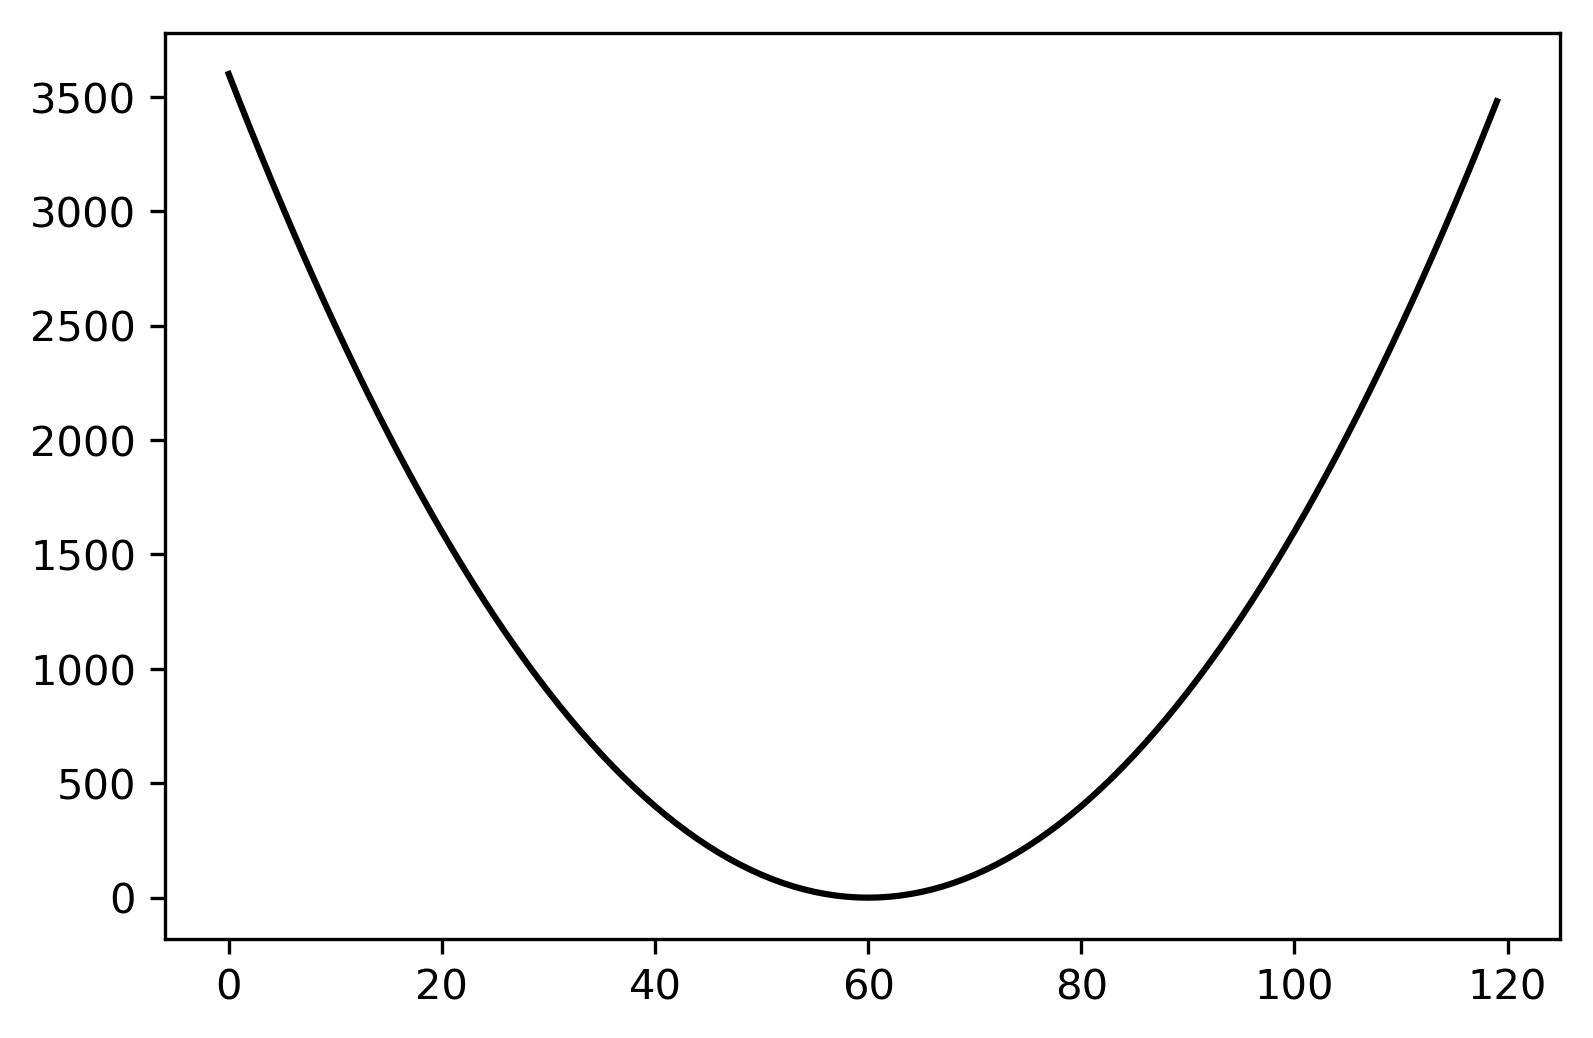

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(dpi=300)
x = np.arange(120)
plt.plot(x, (x - 60) ** 2,'k')
plt.show()

#### Q1) 당뇨 데이터에 대한 w, b값 업데이트 주요 과정은?(딥러닝 프로세스와 연관해서 생각하기)

In [ ]:
for i in range(len(x)) : # 모든 데이터에 대한 반복
    y2 = x[i] * w + b # wx + b (예측값)
    err = y[i] - y2 # 정답과 예측값의 오차
    w = w + err * x[i] # 손실 함수의 w에 대한 기울기 계산 -> 업데이트
    b = b + err # 손실 함수의 b에 대한 기울기 계산 -> 업데이트
print(w,b)

### 3. MNIST 데이터로 딥러닝 모델 만들기
#### * 머신러닝에서 데이터의 중요성(Garbage In Garbage Out)
#### * 지도학습의 개념과 딥러닝 프로세스 이해하기
#### Q1) 딥러닝으로 문제를 해결한다는 것의 의미는?
#### Q2) 모델을 만드는 과정은 코드로 어떻게 구현이 되나?  

In [4]:
# 관련 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# 데이터 불러오기
mnist = keras.datasets.mnist
(X_train,Y_train),(X_validation,Y_validation)= mnist.load_data()

# 데이터 전처리 : 원 핫 인코딩
Y_train = keras.backend.one_hot(Y_train, 10)
Y_validation = keras.backend.one_hot(Y_validation, 10)

# 모델 설계
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일 : 최적화함수,손실함수,평가지표
model.compile(optimizer='sgd',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
# 학습
model.fit(X_train, Y_train)
# 평가
model.evaluate(X_validation, Y_validation)

Using TensorFlow backend.


Train on 60000 samples
60000/60000 [==============================] - 3s 54us/sample - loss: 2027240038.9849 - accuracy: 0.1122
10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.30104387588501, 0.1135]

#### Q3) 딥러닝 모델을 개선하기 위해서는?

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 원 핫 인코딩
X_train, X_test = X_train / 255.0, X_test / 255.0

# catrgorical_crossentropy loss function일 경우 사용
Y_train = keras.backend.one_hot(Y_train, 10)
Y_test = keras.backend.one_hot(Y_test, 10)

from keras.models import Sequential
from keras.layers import Dense

model = keras.models.Sequential()
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  # 레이어 추가
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
# sgd : loss: 0.5932 - accuracy: 0.8379 / [0.2844576924830675, 0.9194]
# rmsprop : loss: 0.2163 - accuracy: 0.9345 / [0.12681207385398446, 0.9604]
# adam : loss: 0.2130 - accuracy: 0.9362 / [0.09847269580680877, 0.9687]

# sparse_catrgorical_crossentropy 
# rmsprop : loss: 0.2167 - accuracy: 0.9344 / [0.12179661720525474, 0.9625]
# adam : loss: 0.2130 - accuracy: 0.9362 / [0.09847269426751881, 0.9687]
# sgd : loss: 0.5932 - accuracy: 0.8379 / [0.2846782550573349, 0.9196]
model.compile(optimizer='sgd',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

# model.fit(X_train, Y_train, epochs = 5)
# model.fit(X_train, Y_train)
# model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 5)
# model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 10)
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 20)
# model.evaluate(X_test, Y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5932 - accuracy: 0.8379 - val_loss: 0.2845 - val_accuracy: 0.9198
Epoch 2/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2565 - accuracy: 0.9263 - val_loss: 0.2117 - val_accuracy: 0.9402
Epoch 3/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2003 - accuracy: 0.9424 - val_loss: 0.1777 - val_accuracy: 0.9495
Epoch 4/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1656 - accuracy: 0.9530 - val_loss: 0.1513 - val_accuracy: 0.9551
Epoch 5/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1399 - accuracy: 0.9599 - val_loss: 0.1341 - val_accuracy: 0.9598
Epoch 6/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1203 - accuracy: 0.9653 - val_loss: 0.1168 - val_accuracy: 0.9652
Epoch 7/20
60000/60000 [==============================] 

#### Q4) 오버피팅(overfitting)이란 무엇이고, 왜 발생할까?
#### Q5) 다음 그래프의 의미는 무엇일까?

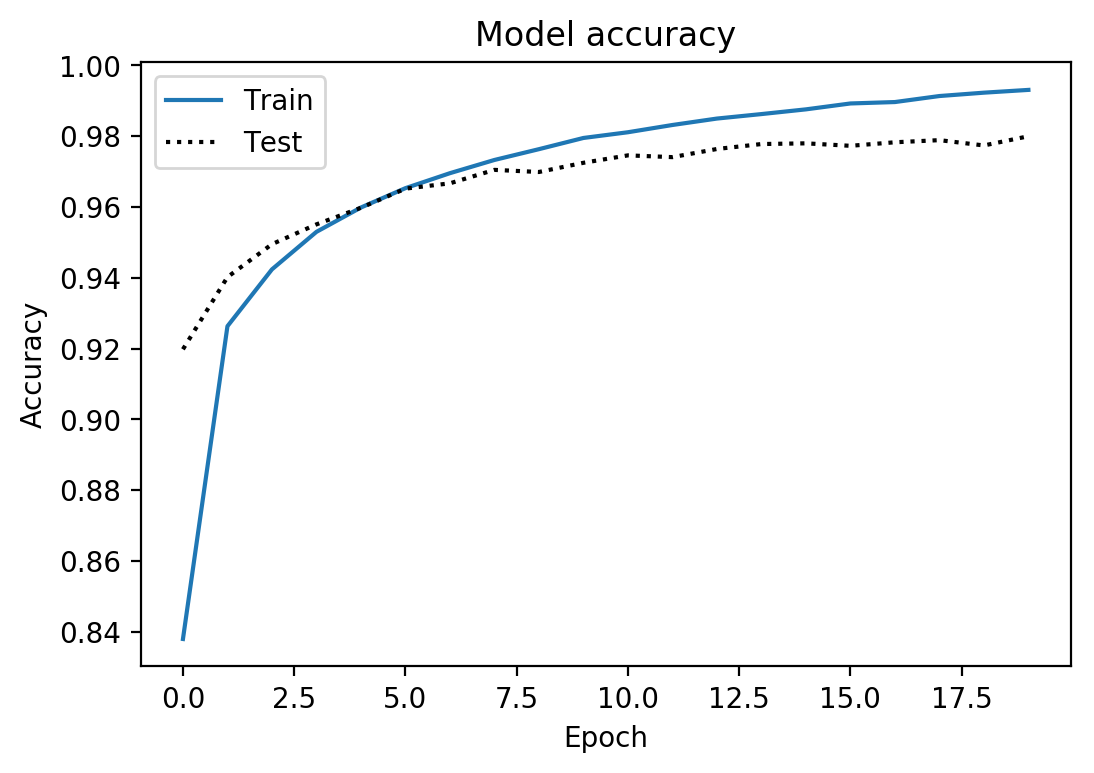

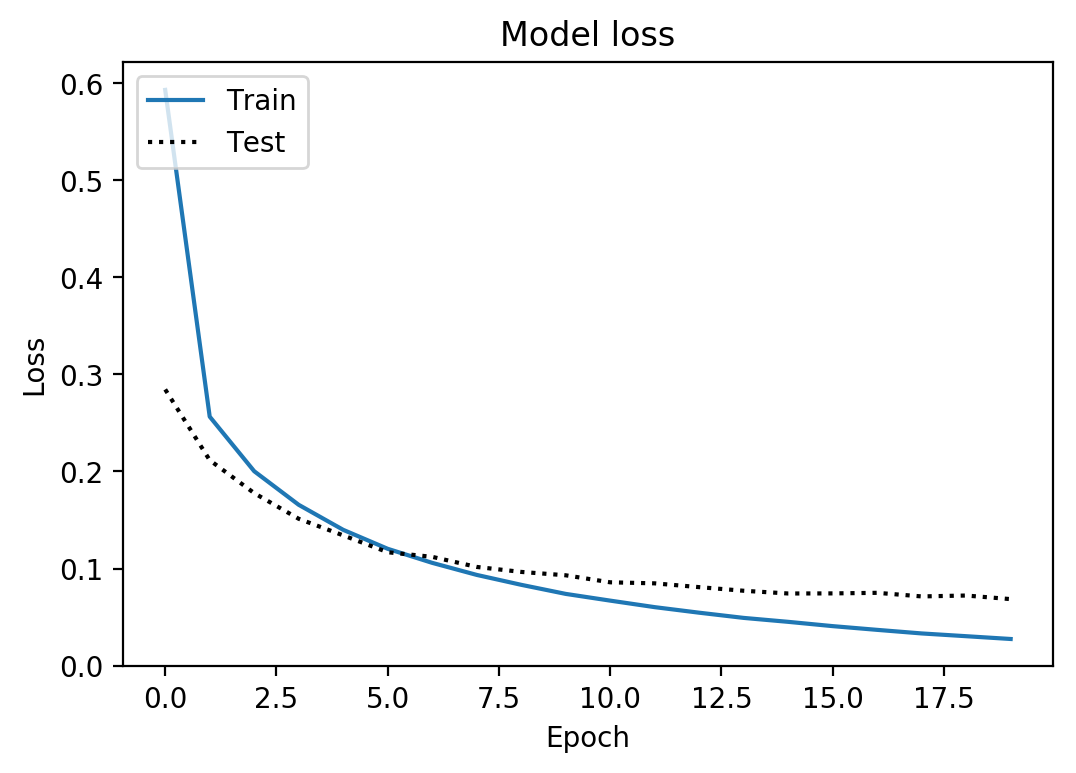

In [9]:
plt.figure(dpi=200)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'k:')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure(dpi=200)
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'k:')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()